<a href="https://colab.research.google.com/github/CrushedKatana/Machine_Learning/blob/main/JS07_Approximate_Nearest_Neighbors_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1

In [3]:
# Install ANNOY
!pip install annoy

In [4]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

In [5]:
# Build Random Dataset and Query Point
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # random value at 100x100 space

# Query point (pick 1 random data point)
query = X[np.random.randint(0, n_points)]

In [6]:
# Compute Exact NN Using Brute Force
# It will visit the data one by one
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 0.9072 ms


In [7]:
# ANNOY 3 Tree
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # find 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")


Annoy NN index: [219, 898, 770]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.568167959732514)]
Waktu Annoy: 0.1838 ms


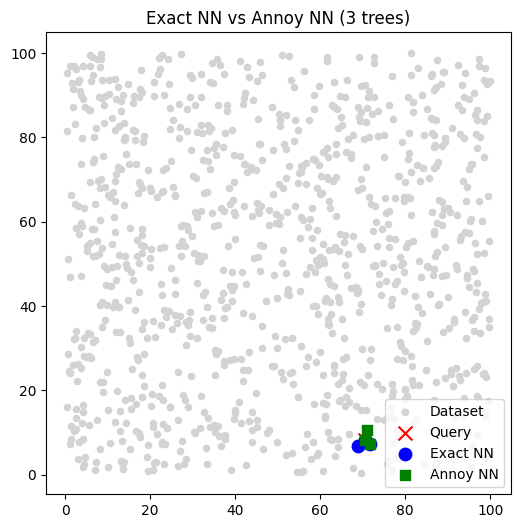

In [8]:
# Visualize
# Knowing the NN produced by Exact NN and ANNOY
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

# Praktikum 2

In [9]:
!pip install faiss-cpu

In [10]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

In [11]:
# Build random data
np.random.seed(42)
X = np.random.rand(1000, 2).astype('float32')  # 1000 data 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query point

In [12]:
# Search NN using Exact NN
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

# Compute Exact NN Time
start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # Find 3 NN
end = time.time()
time_flat = end - start

In [13]:
# Compute FAISS
nlist = 10   # n-cluster (inverted list)
m = 2        # number of subvector
quantizer = faiss.IndexFlatL2(2)   # used by IVF for initiatl cluster
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

In [14]:
# Print The Peformances
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.00039505958557128906
Waktu IVF+PQ: 0.00025725364685058594


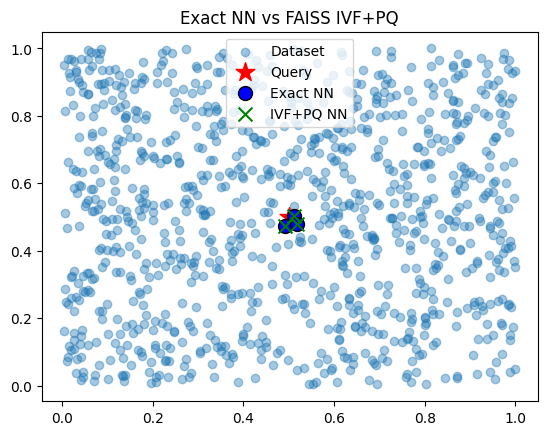

In [15]:
# Visualize
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Flat NN -> Exact NN
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# IVF+PQ NN -> FAISS
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Exact NN vs FAISS IVF+PQ")
plt.show()

# Praktikum 3

In [16]:
!pip install hnswlib

In [ ]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

In [ ]:
# Build Dummy Dataset
num_elements = 1000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)

# Query point
query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5  # cari 5 tetangga terdekat

In [19]:
# Build NN Model
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

# Compute time performace
start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "s")

=== Exact NN ===
Indices: [[830 247 473 913 592]]
Distances: [[0.00993625 0.01363944 0.01646171 0.03779694 0.03859071]]
Waktu: 0.04696846008300781 s


In [20]:
# Initiate Index
p = hnswlib.Index(space='l2', dim=dim)

# Define Max Elements
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Add Data
p.add_items(data)

# Set searching parameter
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "s")


=== HNSW ===
Indices: [[830 247 473 913 592]]
Distances: [[9.8728990e-05 1.8603441e-04 2.7098786e-04 1.4286089e-03 1.4892431e-03]]
Waktu: 0.0002646446228027344 s


# Praktikum 4

In [21]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# Build 1mio rows with 5D
# ===============================
n_data = 1_000_000   # try 100_000 if you have limited memory
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# ===============================
# 3. FAISS (Flat Index)
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")

# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib) ===")
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")

=== Annoy ===
Build time: 22.403966426849365 detik
Query time: 0.00026297569274902344 detik
Neighbors: [129179, 559276, 630783, 213191, 559393] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.008513450622558594 detik
Query time: 0.0063970088958740234 detik
Neighbors: [129179 559276 630783 213191 559393] ...

=== HNSW (hnswlib) ===
Build time: 180.80960154533386 detik
Query time: 0.0003151893615722656 detik
Neighbors: [129179 559276 630783 213191 559393] ...


# Praktikum 5


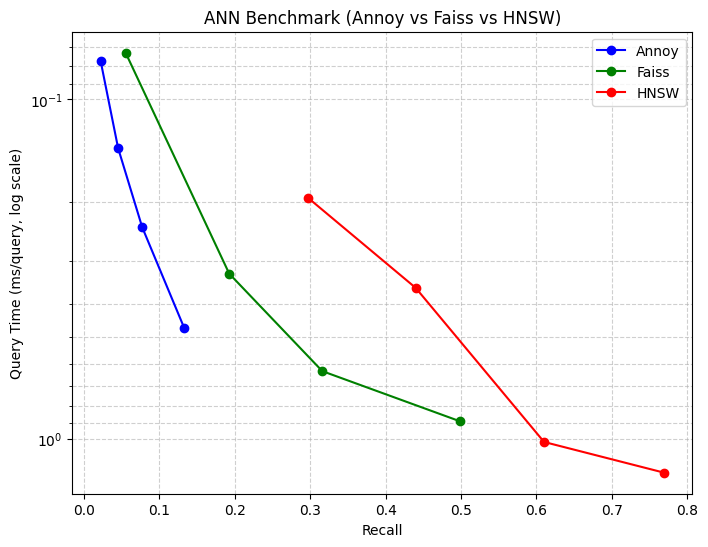

In [2]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import matplotlib.pyplot as plt

# -------------------------------
# Dataset random
# -------------------------------
d = 128        # dimensi
nb = 100000    # jumlah database vector
nq = 1000      # jumlah query

np.random.seed(42)
xb = np.random.random((nb, d)).astype('float32')
xq = np.random.random((nq, d)).astype('float32')

# -------------------------------
# Ground truth dengan FAISS brute force
# -------------------------------
index_flat = faiss.IndexFlatL2(d)
index_flat.add(xb)
k = 10
_, gt_idx = index_flat.search(xq, k)

# -------------------------------
# Fungsi recall
# -------------------------------
def recall_at_k(I_pred, I_gt, k):
    correct = 0
    for i in range(len(I_pred)):
        correct += len(set(I_pred[i][:k]) & set(I_gt[i][:k]))
    return correct / (len(I_pred) * k)

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy(xb, xq, n_trees=10, search_k=1000, k=10):
    f = xb.shape[1]
    index = AnnoyIndex(f, 'euclidean')
    for i, v in enumerate(xb):
        index.add_item(i, v)
    index.build(n_trees)

    start = time.time()
    I = [index.get_nns_by_vector(v, k, search_k=search_k) for v in xq]
    elapsed = (time.time() - start) * 1000 / len(xq)  # ms/query
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark FAISS IVF
# -------------------------------
def run_faiss(xb, xq, nlist=100, nprobe=10, k=10):
    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
    index.train(xb)
    index.add(xb)

    index.nprobe = nprobe
    start = time.time()
    _, I = index.search(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw(xb, xq, ef=100, M=16, k=10):
    num_elements = xb.shape[0]
    p = hnswlib.Index(space='l2', dim=d)
    p.init_index(max_elements=num_elements, ef_construction=200, M=M)
    p.add_items(xb)
    p.set_ef(ef)

    start = time.time()
    I, _ = p.knn_query(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Jalankan benchmark dengan beberapa parameter
# -------------------------------
results = {"Annoy": [], "Faiss": [], "HNSW": []}

# Annoy
for sk in [200, 500, 1000, 2000]:
    rec, t = run_annoy(xb, xq, n_trees=10, search_k=sk)
    results["Annoy"].append((rec, t))

# FAISS
for npb in [1, 5, 10, 20]:
    rec, t = run_faiss(xb, xq, nlist=100, nprobe=npb)
    results["Faiss"].append((rec, t))

# HNSW
for ef in [50, 100, 200, 400]:
    rec, t = run_hnsw(xb, xq, ef=ef)
    results["HNSW"].append((rec, t))

# -------------------------------
# Visualisasi trade-off
# -------------------------------
plt.figure(figsize=(8,6))
for label, color in zip(results.keys(), ["blue","green","red"]):
    recall, qtime = zip(*results[label])
    plt.plot(recall, qtime, marker="o", label=label, color=color)

plt.xlabel("Recall")
plt.ylabel("Query Time (ms/query, log scale)")
plt.yscale("log")
plt.gca().invert_yaxis()  # invert Y, makin kanan makin turun
plt.title("ANN Benchmark (Annoy vs Faiss vs HNSW)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()

# Lab Assignment 1

In [22]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import pandas as pd

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy_benchmark(nb, d, k=10):
    f = d
    index = AnnoyIndex(f, 'euclidean')
    data = np.random.random((nb, d)).astype('float32')
    query = np.random.random((1000, d)).astype('float32')

    build_start = time.time()
    for i, v in enumerate(data):
        index.add_item(i, v)
    index.build(10)  # 10 trees
    build_time = time.time() - build_start

    # Prepare for querying (Annoy uses vector directly)
    query_vectors = query

    query_start = time.time()
    # Using a loop for multiple queries
    for q_vec in query_vectors:
        index.get_nns_by_vector(q_vec, k)
    query_time = (time.time() - query_start) / 1000 # time per query

    return build_time, query_time

# -------------------------------
# Benchmark FAISS
# -------------------------------
def run_faiss_benchmark(nb, d, k=10):
    data = np.random.random((nb, d)).astype('float32')
    query = np.random.random((1000, d)).astype('float32')

    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, 100, faiss.METRIC_L2) # nlist=100

    build_start = time.time()
    index.train(data)
    index.add(data)
    build_time = time.time() - build_start

    index.nprobe = 10 # nprobe=10
    query_start = time.time()
    _, I = index.search(query, k)
    query_time = (time.time() - query_start) / 1000 # time per query

    return build_time, query_time


# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw_benchmark(nb, d, k=10):
    data = np.random.random((nb, d)).astype('float32')
    query = np.random.random((1000, d)).astype('float32')

    num_elements = nb
    p = hnswlib.Index(space='l2', dim=d)

    build_start = time.time()
    p.init_index(max_elements=num_elements, ef_construction=200, M=16)
    p.add_items(data)
    build_time = time.time() - build_start

    p.set_ef(50) # ef=50
    query_start = time.time()
    p.knn_query(query, k=k)
    query_time = (time.time() - query_start) / 1000 # time per query

    return build_time, query_time

# -------------------------------
# Run benchmark with different parameters and collect results
# -------------------------------
criteria = {
    "1000/2D": (1000, 2),
    "1000/5D": (1000, 5),
    "1000000/2D": (1000000, 2),
    "1000000/5D": (1000000, 5)
}

results = {}

print("Running benchmarks...")
for label, (nb, d) in criteria.items():
    print(f"\nCriterion: {label}")
    np.random.seed(42) # for reproducibility

    print("  Benchmarking Annoy...")
    annoy_build, annoy_query = run_annoy_benchmark(nb, d)
    print(f"    Annoy Build Time: {annoy_build:.4f} s, Query Time (per query): {annoy_query:.6f} s")


    print("  Benchmarking FAISS...")
    faiss_build, faiss_query = run_faiss_benchmark(nb, d)
    print(f"    FAISS Build Time: {faiss_build:.4f} s, Query Time (per query): {faiss_query:.6f} s")


    print("  Benchmarking HNSW...")
    hnsw_build, hnsw_query = run_hnsw_benchmark(nb, d)
    print(f"    HNSW Build Time: {hnsw_build:.4f} s, Query Time (per query): {hnsw_query:.6f} s")

    results[label] = {
        "Annoy Build Time (s)": annoy_build,
        "Annoy Query Time (s/query)": annoy_query,
        "FAISS Build Time (s)": faiss_build,
        "FAISS Query Time (s/query)": faiss_query,
        "HNSW Build Time (s)": hnsw_build,
        "HNSW Query Time (s/query)": hnsw_query
    }

# -------------------------------
# Display results in a table
# -------------------------------
df_results = pd.DataFrame.from_dict(results, orient='index')
df_results = df_results[['Annoy Build Time (s)', 'Annoy Query Time (s/query)',
                         'FAISS Build Time (s)', 'FAISS Query Time (s/query)',
                         'HNSW Build Time (s)', 'HNSW Query Time (s/query)']]

print("\n--- Performance Comparison Table ---")
display(df_results)

Running benchmarks...

Criterion: 1000/2D
  Benchmarking Annoy...
    Annoy Build Time: 0.0215 s, Query Time (per query): 0.000023 s
  Benchmarking FAISS...
    FAISS Build Time: 0.0024 s, Query Time (per query): 0.000004 s
  Benchmarking HNSW...
    HNSW Build Time: 0.0531 s, Query Time (per query): 0.000010 s

Criterion: 1000/5D
  Benchmarking Annoy...
    Annoy Build Time: 0.0148 s, Query Time (per query): 0.000020 s
  Benchmarking FAISS...
    FAISS Build Time: 0.0018 s, Query Time (per query): 0.000004 s
  Benchmarking HNSW...
    HNSW Build Time: 0.0639 s, Query Time (per query): 0.000013 s

Criterion: 1000000/2D
  Benchmarking Annoy...
    Annoy Build Time: 28.1474 s, Query Time (per query): 0.000068 s
  Benchmarking FAISS...
    FAISS Build Time: 0.4253 s, Query Time (per query): 0.000831 s
  Benchmarking HNSW...
    HNSW Build Time: 105.6030 s, Query Time (per query): 0.000018 s

Criterion: 1000000/5D
  Benchmarking Annoy...
    Annoy Build Time: 20.7600 s, Query Time (per que

,Annoy Build Time (s),Annoy Query Time (s/query),FAISS Build Time (s),FAISS Query Time (s/query),HNSW Build Time (s),HNSW Query Time (s/query)
1000/2D,0.021501,0.000023,0.002365,0.000004,0.053094,0.000010
1000/5D,0.014779,0.000020,0.001795,0.000004,0.063899,0.000013
1000000/2D,28.147398,0.000068,0.425271,0.000831,105.603029,0.000018
1000000/5D,20.760005,0.000056,0.244353,0.000817,172.821296,0.000038


# Lab Assignment 2

In [28]:
import pandas as pd
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Load dataset
# -------------------------------
# NOTE: Make sure to upload the dataset to your Colab environment
# or mount your Google Drive and update the path accordingly.
# For example, if the file is in a folder named 'ml' in your Drive:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/ML/songs_with_attributes_and_lyrics.csv')

# Assuming the file is uploaded directly to the Colab environment for this example
# df = pd.read_csv('songs_with_attributes_and_lyrics.csv')

features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features].values

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 10  # jumlah nearest neighbors

print("Dataset loaded and features scaled.")
print("Shape of the scaled data:", X_scaled.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded and features scaled.
Shape of the scaled data: (955320, 9)


In [29]:
# -------------------------------
# 3. Perform nearest track search and compare the results.
# 4. Compare the performance among Exact NN, Annoy, FAISS, and HNSW.
# -------------------------------

# Perform Exact NN using NearestNeighbors (Brute Force)
print("Performing Exact NN search...")
nn_exact = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')

start_exact = time.time()
distances_exact, indices_exact = nn_exact.fit(X_scaled).kneighbors(X_scaled[0:100]) # Using first 100 points as queries for comparison
time_exact = time.time() - start_exact

print(f"Exact NN search completed in {time_exact:.4f} seconds.")

# Perform ANN search using Annoy
print("\nPerforming Annoy search...")
f = X_scaled.shape[1]
annoy_index = AnnoyIndex(f, 'euclidean')

start_annoy_build = time.time()
for i in range(X_scaled.shape[0]):
    annoy_index.add_item(i, X_scaled[i])
annoy_index.build(10)  # 10 trees
time_annoy_build = time.time() - start_annoy_build

start_annoy_query = time.time()
annoy_neighbors = [annoy_index.get_nns_by_vector(X_scaled[i], k) for i in range(100)] # Using first 100 points as queries
time_annoy_query = time.time() - start_annoy_query

print(f"Annoy build time: {time_annoy_build:.4f} seconds.")
print(f"Annoy query time for 100 queries: {time_annoy_query:.4f} seconds.")

# Perform ANN search using FAISS
print("\nPerforming FAISS search...")
d = X_scaled.shape[1]
quantizer = faiss.IndexFlatL2(d)
faiss_index = faiss.IndexIVFFlat(quantizer, d, 100, faiss.METRIC_L2) # nlist=100

start_faiss_build = time.time()
faiss_index.train(X_scaled)
faiss_index.add(X_scaled)
time_faiss_build = time.time() - start_faiss_build

faiss_index.nprobe = 10 # nprobe=10
start_faiss_query = time.time()
distances_faiss, indices_faiss = faiss_index.search(X_scaled[0:100], k) # Using first 100 points as queries
time_faiss_query = time.time() - start_faiss_query

print(f"FAISS build time: {time_faiss_build:.4f} seconds.")
print(f"FAISS query time for 100 queries: {time_faiss_query:.4f} seconds.")

# Perform ANN search using HNSW
print("\nPerforming HNSW search...")
dim = X_scaled.shape[1]
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start_hnsw_build = time.time()
hnsw_index.init_index(max_elements=X_scaled.shape[0], ef_construction=200, M=16)
hnsw_index.add_items(X_scaled)
time_hnsw_build = time.time() - start_hnsw_build

hnsw_index.set_ef(50) # ef=50
start_hnsw_query = time.time()
hnsw_labels, hnsw_distances = hnsw_index.knn_query(X_scaled[0:100], k=k) # Using first 100 points as queries
time_hnsw_query = time.time() - start_hnsw_query

print(f"HNSW build time: {time_hnsw_build:.4f} seconds.")
print(f"HNSW query time for 100 queries: {time_hnsw_query:.4f} seconds.")

# -------------------------------
# Compare the results (optional: check accuracy)
# -------------------------------
# You can compare the indices found by each method to the exact NN results.
# For simplicity, we will focus on the time performance comparison as requested.

print("\n--- Performance Comparison ---")
print(f"Exact NN Query Time (for 100 queries): {time_exact:.4f} seconds")
print(f"Annoy Build Time: {time_annoy_build:.4f} seconds, Query Time (for 100 queries): {time_annoy_query:.4f} seconds")
print(f"FAISS Build Time: {time_faiss_build:.4f} seconds, Query Time (for 100 queries): {time_faiss_query:.4f} seconds")
print(f"HNSW Build Time: {time_hnsw_build:.4f} seconds, Query Time (for 100 queries): {time_hnsw_query:.4f} seconds")

Performing Exact NN search...
Exact NN search completed in 0.5901 seconds.

Performing Annoy search...
Annoy build time: 19.3110 seconds.
Annoy query time for 100 queries: 0.0058 seconds.

Performing FAISS search...
FAISS build time: 0.3231 seconds.
FAISS query time for 100 queries: 0.0665 seconds.

Performing HNSW search...
HNSW build time: 233.5652 seconds.
HNSW query time for 100 queries: 0.0059 seconds.

--- Performance Comparison ---
Exact NN Query Time (for 100 queries): 0.5901 seconds
Annoy Build Time: 19.3110 seconds, Query Time (for 100 queries): 0.0058 seconds
FAISS Build Time: 0.3231 seconds, Query Time (for 100 queries): 0.0665 seconds
HNSW Build Time: 233.5652 seconds, Query Time (for 100 queries): 0.0059 seconds
